In [2]:

import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.subplots as sp


In [3]:
# Evitamos que los números grandes aparezcan en notación científica:
pd.set_option("display.float_format", lambda x: "{:,.1f}".format(x))

In [4]:
# Cambio el límite de filas mostradas:
pd.set_option("display.max_rows", 15)

In [5]:
# Obtención del dataframe con datos de población globales.
path_global_population_csv = "./Data/population.csv"
df_global_population = pd.read_csv(path_global_population_csv)


In [6]:
# Limpieza del dataframe para quedarnos únicamente con los valores para China y las columnas de año y población total.
df_china_population = df_global_population.copy()
df_china_population = df_china_population.loc[df_china_population["Country name"] == "China"].reset_index()
df_china_population = df_china_population[["Year", "Population"]]
df_china_population = df_china_population.rename(columns={"Year": "Año", "Population" : "Población"})
df_china_population

,Año,Población
0,1950,543979200
1,1951,553614000
2,1952,564954500
3,1953,577378700
4,1954,589936000
...,...,...
67,2017,1410276000
68,2018,1417069400
69,2019,1421864100
70,2020,1424929800


In [7]:
# Ahora este DF está listo para ser comprobado visualmente.
fig_china_population = px.line(df_china_population, x= "Año", y= "Población",
                               title = "Evolución de la población en China",
                               color_discrete_sequence=["red"])
fig_china_population.update_yaxes(tickformat="0,.0f", ticksuffix="M") # Cambio el formato de los valores en el eje Y.
fig_china_population.update_layout(template="plotly_dark") 

fig_china_population.show()

# Al aportar una idea genérica es útil como introducción al tema del EDA.

In [8]:
# Ahora queremos comprobar la tasa de variación interanual.
df_var_interanual_china = df_china_population.copy()
df_var_interanual_china["Crecimiento interanual"] = df_var_interanual_china["Población"].pct_change(periods = 1)*100

# Gestiono el valor NaN de la primera fila (ya que no se puede calcular variación). En este caso pongo el mismo que la fila siguiente.
df_var_interanual_china["Crecimiento interanual"].fillna(method="bfill", inplace=True)
df_var_interanual_china

,Año,Población,Crecimiento interanual
0,1950,543979200,1.8
1,1951,553614000,1.8
2,1952,564954500,2.0
3,1953,577378700,2.2
4,1954,589936000,2.2
...,...,...,...
67,2017,1410276000,0.6
68,2018,1417069400,0.5
69,2019,1421864100,0.3
70,2020,1424929800,0.2


In [9]:
# Generando un gráfico de líneas con la información de la variación interanual puedo darme cuenta de anomalías y cambios en la tendencia:

fig_var_interanual_china = px.line(df_var_interanual_china, x= "Año", y= "Crecimiento interanual",
                                    title = "Crecimiento interanual de la población en China (en %)",
                                    color_discrete_sequence=["red"])
fig_var_interanual_china.update_layout(template="plotly_dark") 
fig_var_interanual_china.show()

# Vemos que hay una caída brusca entre 1958 y 1961 que luego remonta.
# Además, a partir de los años 60 la tendencia es a la baja.
# Hay explicación para estos dos fenómenos.

In [10]:
# Puede ser interesante compararlo con la media mundial para el mismo período, así que sacaremos esos datos:
df_global_mean = df_global_population.copy()
df_global_mean = df_global_mean[["Country name", "Year", "Population"]]
df_global_mean = df_global_mean.rename(columns={"Country name": "País", "Year": "Año", "Population" : "Población"})
df_global_mean["Crecimiento interanual"] = df_global_mean["Población"].pct_change(periods = 1)*100

df_global_mean = df_global_mean.drop("País", axis = 1).groupby("Año")["Crecimiento interanual"].mean().reset_index()
df_global_mean = df_global_mean.rename(columns={"Crecimiento interanual" : "Crecimiento interanual medio"})

# Como me da un valor extraño para la primera fila, la relleno con el falor de la siguiente fila.
df_global_mean["Crecimiento interanual medio"][0] = df_global_mean["Crecimiento interanual medio"][1]




df_global_mean




C:\Users\prado\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Año,Crecimiento interanual medio
0,1950,2.0
1,1951,2.0
2,1952,2.0
3,1953,2.0
4,1954,2.1
...,...,...
67,2017,1.1
68,2018,1.2
69,2019,1.2
70,2020,1.0


In [11]:
# Creo una figura para comprobar la tendencia media global.

fig_global_variation_mean = px.line(df_global_mean, x= "Año", y= "Crecimiento interanual medio",
                                    title = "Crecimiento medio de la población mundial (en %)")
fig_global_variation_mean.update_layout(template="plotly_dark") 

fig_global_variation_mean.show()

In [12]:
# Creo una figura superponiendo ambas variables para comprobar si se asemejan o difieren.

fig_comparar_var_pobl = px.line(df_var_interanual_china, x="Año", y="Crecimiento interanual",
                                color_discrete_sequence=["red"],
                                title="Crecimiento anual de la población china vs mundial (en %)",
                                labels={"Crecimiento interanual": "China"})
fig_comparar_var_pobl.add_trace(fig_global_variation_mean.data[0])
fig_comparar_var_pobl.update_layout(template="plotly_dark")

fig_comparar_var_pobl.show()


In [13]:
# Hago una copia de la figura anterior añadiendo una anotación explicativa.

fig_gran_salto_adelante = go.Figure(fig_comparar_var_pobl)
fig_gran_salto_adelante.add_annotation(x=1958, 
                    y=df_var_interanual_china.loc[df_var_interanual_china["Año"] == 1958, "Crecimiento interanual"].iloc[0],
                    text="Gran Salto Adelante",
                    showarrow=True, arrowhead=5)
fig_gran_salto_adelante.show()

In [14]:
# Creo otra copia a partir de la figura anterior para añadir otra anotación relevante más.
fig_control_natalidad = go.Figure(fig_gran_salto_adelante)
fig_control_natalidad.add_annotation(x=1980, 
                    y=df_var_interanual_china.loc[df_var_interanual_china["Año"] == 1980, "Crecimiento interanual"].iloc[0],
                    text="Política Hijo único",
                    showarrow=True, arrowhead=5)
fig_control_natalidad.show()

In [15]:
# Ahora empezaremos a trabajar con otro conjunto de datos centrado en la tasa de fertilidad.
path_global_fertility = "./Data/fertility-rate.csv"
df_global_fertility = pd.read_csv(path_global_fertility)
df_global_fertility = df_global_fertility[["Country name", "Year", "Fertility rate: children per woman"]]
df_global_fertility = df_global_fertility.rename(
                            columns={"Year": "Año", "Fertility rate: children per woman": "Tasa de fertilidad"}
    )
# df_global_fertility

In [16]:
# Filtramos el dataset previo para obtener los datos de China.

df_china_fertility = df_global_fertility[df_global_fertility["Country name"] == "China"].reset_index()
df_china_fertility = df_china_fertility[["Año", "Tasa de fertilidad"]]
df_china_fertility

,Año,Tasa de fertilidad
0,1950,5.8
1,1951,5.7
2,1952,6.5
3,1953,6.0
4,1954,6.3
...,...,...
67,2017,1.8
68,2018,1.6
69,2019,1.5
70,2020,1.3


In [17]:
# Con esos datos puedo crear otro gráfico ilustrativo de la tendencia.

fig_china_fertility = px.line(df_china_fertility, x= "Año", y= "Tasa de fertilidad",
                              color_discrete_sequence=["green"],
                              title = "Tasa de fertilidad en China por año")
fig_china_fertility.add_annotation(x=1991, y=2, text="Tasa de sustitución",
                                showarrow=True, arrowhead=5)
fig_china_fertility.add_annotation(x=1980, y=2.8, text="Hijo Único",
                                showarrow=True, arrowhead=5)


fig_china_fertility.update_layout(template="plotly_dark") 
fig_china_fertility.show()

In [18]:
# Ahora juntaré dos gráficas anteriores en un subplot para comparar.

subplot_1 = sp.make_subplots(rows= 2, cols= 2, 
                             subplot_titles=("Tasa de fertilidad", "Crecimiento interanual"),
                             column_widths=[0.5, 0.5], 
                             row_heights=[1,0])
subplot_1.add_trace(fig_china_fertility.data[0], row=1, col=1)
subplot_1.add_trace(fig_var_interanual_china.data[0], row=1, col=2)
subplot_1.update_layout(template="plotly_dark", title="Similitud entre ambas variables")
subplot_1.show()


In [19]:
# Ahora cargaremos la tasa de sexo por nacimiento. Esto cuenta los hombres que nacen por cada 100 mujeres que nacen.
global_male_ratio_at_brith_path = "./Data/global_male_ratio_at_birth.csv"
df_global_male_ratio_at_birth_raw = pd.read_csv(global_male_ratio_at_brith_path)
df_global_male_ratio_at_birth_raw

,Entity,Code,Year,Sex ratio at birth (Chao et al. 2019)
0,Afghanistan,AFG,1950,105.2
1,Afghanistan,AFG,1951,105.2
2,Afghanistan,AFG,1952,105.2
3,Afghanistan,AFG,1953,105.2
4,Afghanistan,AFG,1954,105.2
...,...,...,...,...
14411,Zimbabwe,ZWE,2013,102.2
14412,Zimbabwe,ZWE,2014,102.2
14413,Zimbabwe,ZWE,2015,102.2
14414,Zimbabwe,ZWE,2016,102.3


In [20]:
# Obtenemos la media por país
df_male = df_global_male_ratio_at_birth_raw.copy()
df_male = df_male[["Entity", "Year", "Sex ratio at birth (Chao et al. 2019)"]]
df_male = df_male.rename(columns={"Entity": "País", "Year": "Año", "Sex ratio at birth (Chao et al. 2019)" : "Ratio"})
df_male = df_male.groupby("País")["Ratio"].mean()
fig_male = px.scatter(df_male, 
                      title="Media de nacimientos de hombres por cada 100 mujeres por país entre 1960 y 2021")
fig_male.add_annotation(x="China", y=111, text="China, 110.8",
                                showarrow=True, arrowhead=5)
fig_male.update_layout(template="plotly_dark", yaxis_title="Nº de nacimientos(H)",
                       showlegend = False)

fig_male

In [21]:
# Hacemos un boxplot estudiar mejor los outliers.

fig_boxplot_male = px.box(df_male, y= "Ratio", points="all", 
                          title= "Concentración de los valores medios de nacimientos de hombres por país")
fig_boxplot_male.update_layout(template="plotly_dark", yaxis_title="Nº de nacimientos(H)")
fig_boxplot_male.add_annotation(x = - 0.375, y=111, text="China, 110.8",
                                showarrow=True, arrowhead=5)
fig_boxplot_male

In [22]:
# Analizaremos ahora el histórico de esa variable para China. 

df_male_china = df_global_male_ratio_at_birth_raw.copy()
df_male_china = df_male_china[["Entity", "Year", "Sex ratio at birth (Chao et al. 2019)"]]
df_male_china = df_male_china.rename(columns={"Entity": "País", "Year": "Año", "Sex ratio at birth (Chao et al. 2019)" : "Ratio"})
df_male_china = df_male_china.loc[df_male_china["País"] == "China"].reset_index().drop(columns="index")
df_male_china

,País,Año,Ratio
0,China,1950,106.3
1,China,1951,106.3
2,China,1952,106.3
3,China,1953,106.3
4,China,1954,106.3
...,...,...,...
63,China,2013,116.4
64,China,2014,116.0
65,China,2015,115.5
66,China,2016,114.9


In [23]:
fig_male_china = px.line(df_male_china, x="Año", y= "Ratio", 
                         title="Evolución del ratio de nacimiento de hombres en China (hasta 2017)")
fig_male_china.update_layout(template="plotly_dark")
fig_male_china

In [24]:
# Realizamos copia del gráfico anterior para añadir anotaciones.

fig_male_china2 = go.Figure(fig_male_china)
fig_male_china2.add_annotation(x=1980, y=df_male_china.loc[df_male_china["Año"] == 1980, "Ratio"].iloc[0],
                    text="Política Hijo único",
                    showarrow=True, arrowhead=5)

In [25]:
# Viendo esta diferencia entre nacimientos de hombres y de mujeres sería interesante realizar un estudio de la pirámide poblacional.
# Para ello esta vez usaremos dos fuentes con datos globales, una por cada género, y las uniremos.


path_male_population_csv = "./Data/HOMBRES_poblacion_mundial_world_bank_API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_5364198.csv"
df_male_population = pd.read_csv(path_male_population_csv, skiprows= 4, sep="\t")

path_female_population_csv = "./Data/MUJERES_poblacion_mundial_world_bank_API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_5358763.csv"
df_female_population = pd.read_csv(path_female_population_csv, skiprows= 4, sep="\t")
df_male_population




,Country Name,Sex,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,male,"26,834.0","27,431.0","27,863.0","28,256.0","28,608.0","28,906.0","29,155.0","29,268.0",...,"48,632.0","48,927.0","49,191.0","49,430.0","49,650.0","49,847.0","50,026.0","50,188.0","50,211.0","50,207.0"
1,Africa Eastern and Southern,male,"64,839,355.0","66,562,958.0","68,378,478.0","70,254,903.0","72,219,820.0","74,263,952.0","76,345,445.0","78,502,294.0",...,"272,984,078.0","280,667,089.0","288,561,829.0","296,812,390.0","304,990,070.0","313,109,073.0","321,597,902.0","330,311,880.0","339,222,972.0","348,121,749.0"
2,Afghanistan,male,"4,476,521.0","4,556,369.0","4,642,166.0","4,732,954.0","4,828,823.0","4,930,806.0","5,037,166.0","5,148,111.0",...,"15,399,105.0","15,946,572.0","16,543,889.0","17,071,446.0","17,520,861.0","18,028,696.0","18,549,862.0","19,090,409.0","19,692,301.0","20,254,878.0"
3,Africa Western and Central,male,"48,453,387.0","49,463,944.0","50,516,419.0","51,622,609.0","52,763,251.0","53,946,909.0","55,176,615.0","56,429,754.0",...,"189,042,690.0","194,304,472.0","199,691,984.0","205,176,501.0","210,797,955.0","216,559,711.0","222,392,987.0","228,301,205.0","234,311,512.0","240,372,329.0"
4,Angola,male,"2,686,966.0","2,736,939.0","2,778,711.0","2,820,354.0","2,860,608.0","2,897,642.0","2,930,305.0","2,959,577.0",...,"12,417,550.0","12,894,065.0","13,381,965.0","13,878,923.0","14,390,171.0","14,915,293.0","15,445,494.0","15,983,035.0","16,517,497.0","17,051,491.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Samoa,male,"58,407.0","60,202.0","61,949.0","63,675.0","65,361.0","67,063.0","68,756.0","70,219.0",...,"101,665.0","102,510.0","103,356.0","104,201.0","105,129.0","106,119.0","107,099.0","108,147.0","109,634.0","111,550.0"
249,Kosovo,male,"480,530.0","490,286.0","504,594.0","518,893.0","533,197.0","547,497.0","561,776.0","576,561.0",...,"902,010.0","907,413.0","904,599.0","892,179.0","886,760.0","893,367.0","896,319.0","892,156.0","892,592.0","890,237.0"
250,South Africa,male,"8,502,461.0","8,725,719.0","8,971,110.0","9,228,327.0","9,496,079.0","9,774,939.0","10,062,791.0","10,359,445.0",...,"25,651,390.0","26,036,121.0","26,500,685.0","27,155,417.0","27,418,165.0","27,465,269.0","27,822,349.0","28,207,948.0","28,580,784.0","28,894,608.0"
251,Zambia,male,"1,544,463.0","1,593,349.0","1,644,170.0","1,696,940.0","1,751,316.0","1,807,590.0","1,866,095.0","1,926,564.0",...,"7,245,485.0","7,491,633.0","7,744,381.0","8,000,338.0","8,260,471.0","8,525,934.0","8,794,716.0","9,066,397.0","9,338,613.0","9,609,004.0"


In [26]:
# Preparamos los dos DF con datos de población por género en China y reestructuramos las filas y columnas.

# Primero el DF de hombres.
df_male_population_china = df_male_population.copy()

df_male_population_china = df_male_population_china.loc[
    df_male_population_china["Country Name"] == "China"].drop(
    columns="Country Name").drop(columns="Sex")

df_male_population_china = df_male_population_china.melt(
    var_name='Year', value_name='Population')


# Ahora el DF de mujeres.
df_female_population_china = df_female_population.copy()

df_female_population_china = df_female_population_china.loc[
    df_female_population_china["Country Name"] == "China"].drop(
    columns="Country Name").drop(columns="Sex")

df_female_population_china = df_female_population_china.melt(
    var_name='Year', value_name='Population')




In [27]:
# Ahora hacemos join de los dos DF con merge.
df_merged_population_china = pd.merge(df_male_population_china, df_female_population_china, on="Year")
df_merged_population_china = df_merged_population_china.rename(
    columns={"Population_x": "Male", "Population_y": "Female"})
df_merged_population_china


,Year,Male,Female
0,1960,"341,138,996.0","325,931,004.0"
1,1961,"337,450,093.0","322,879,907.0"
2,1962,"340,026,760.0","325,743,240.0"
3,1963,"348,325,853.0","334,009,147.0"
4,1964,"356,360,258.0","341,994,742.0"
...,...,...,...
57,2017,"714,208,198.0","682,006,802.0"
58,2018,"717,291,023.0","685,468,978.0"
59,2019,"719,565,010.0","688,179,990.0"
60,2020,"720,928,153.0","690,171,848.0"


In [28]:
'''
Estas líneas de código son para comprobar la diferencia en términos relativos, por si fuese más visual
mostrar la pirámide como peso del género en el % de la población, pero no ha sido así, por lo que no lo
utilizaremos.
'''

# Para que se vea mejor la diferencia de población probamos a relativizar el peso de cada género sobre el total de la población.


# df_merged_population_china["Total Pop."] = df_merged_population_china["Male"] + df_merged_population_china["Female"]
# df_merged_population_china["Male relative"] = df_merged_population_china["Male"] / df_merged_population_china["Total Pop."] * 100

# df_merged_population_china["Female relative"] = df_merged_population_china["Female"] / df_merged_population_china["Total Pop."] * 100


# df_merged_population_china["Male relative"] = df_merged_population_china["Male relative"].apply(lambda x: '{:.4f}'.format(x))
# df_merged_population_china["Female relative"] = df_merged_population_china["Female relative"].apply(lambda x: '{:.4f}'.format(x))
# df_merged_population_china

'\nEstas líneas de código son para comprobar la diferencia en términos relativos, por si fuese más visual\nmostrar la pirámide como peso del género en el % de la población, pero no ha sido así, por lo que no lo\nutilizaremos.\n'

In [29]:
# Preparamos los ejes para el gráfico:
y_year = df_merged_population_china["Year"]
x_M = df_merged_population_china["Male"] 
x_F = df_merged_population_china["Female"] * -1 # Para que los valores sean negativos y vayan en la otra dirección.


In [30]:
# Creamos el gráfico.
piramide = go.Figure()

# Añadimos los datos para hombres.
piramide.add_trace(go.Bar(y= y_year, x = x_M,
                          name = "Hombres", 
                          orientation = "h"))


piramide.add_trace(go.Bar(y= y_year, x = x_F,
                          name = "Mujeres", 
                          orientation = "h"))

piramide.update_layout(template="plotly_dark")

In [31]:
# Retocamos el gráfico.

piramide.update_layout(title = "Evolución de la pirámide de población china",
                 title_font_size = 22
                 )
  
piramide.show()

In [32]:
# La diferencia de género sobre unos volúmenes tan grandes de población no es fácilmente reconocible de forma visual,
# así que lo que haremos será mostrar una tabla con la resta de mujeres a hombres.

dif_h_m = df_merged_population_china.copy()
dif_h_m["Diferencia (hombres)"] = dif_h_m["Male"] - dif_h_m["Female"]
dif_h_m

,Year,Male,Female,Diferencia (hombres)
0,1960,"341,138,996.0","325,931,004.0","15,207,992.0"
1,1961,"337,450,093.0","322,879,907.0","14,570,186.0"
2,1962,"340,026,760.0","325,743,240.0","14,283,520.0"
3,1963,"348,325,853.0","334,009,147.0","14,316,706.0"
4,1964,"356,360,258.0","341,994,742.0","14,365,516.0"
...,...,...,...,...
57,2017,"714,208,198.0","682,006,802.0","32,201,396.0"
58,2018,"717,291,023.0","685,468,978.0","31,822,045.0"
59,2019,"719,565,010.0","688,179,990.0","31,385,020.0"
60,2020,"720,928,153.0","690,171,848.0","30,756,305.0"


In [33]:
# Este valor (Diferencia) sí que es más visual:

fig_diferencia_h_m = px.line(dif_h_m, x="Year", y="Diferencia (hombres)", title="Exceso de hombres por año")
fig_diferencia_h_m.update_layout(template="plotly_dark")
# fig_diferencia_h_m.add_annotation(x=1980, y=dif_h_m["Diferencia (hombres)"].iloc[20],
#                     text="Política Hijo único",
#                     showarrow=True, arrowhead=5)

fig_diferencia_h_m



Text(0.5, 1.0, 'Mapa de correlación')

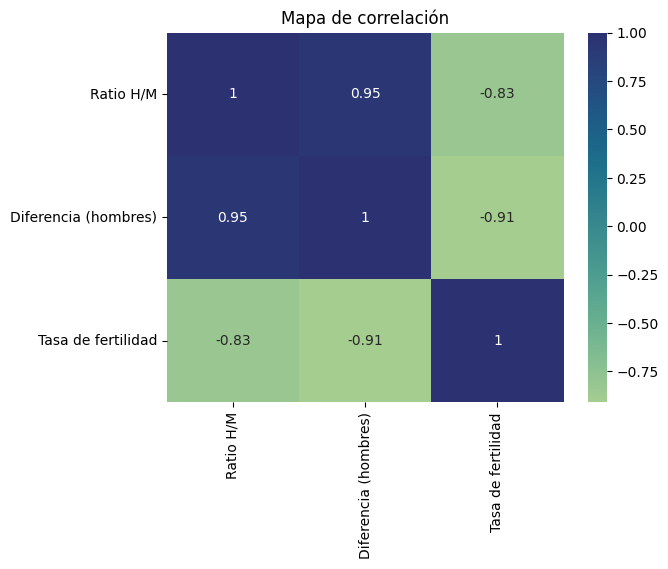

In [35]:
# Correlación entre descenso tasa fertilidad y nº de hombres y mujeres.
corr_matrix = pd.DataFrame
col1 = df_male_china["Ratio"]
col1 = col1.rename("Ratio H/M")
col2 = dif_h_m["Diferencia (hombres)"]
#col3 = df_var_interanual_china["Crecimiento interanual"]
col4 = df_china_fertility["Tasa de fertilidad"]

corr_matrix = pd.concat([col1, col2, col4], axis=1)
corr = corr_matrix.corr()
mapa_calor = sns.heatmap(corr, annot=True, cmap="crest")
mapa_calor.set_title("Mapa de correlación")




In [47]:
# También podemos calcular el tasa de dependencia. Se calcula como el % de personas en edad de no trabajar
# 0-15 años más mayores de 65 partido el total de la población en edad de trabajar (15-65 años) * 100

# Cargamos el csv con nuevos datos por edad (y género, pero esto en este punto es secundario).

path_edad = "Data\China-2023-age-and-gender.csv"
df_edad = pd.read_csv(path_edad, sep= "\t")



,Age,M,F,Total 0-14,Total 65+,Total active
0,0-4,32318569,28826052,"239,340,939.0","203,394,991.0","982,935,414.0"
1,5-9,47383460,41333615,NaN,NaN,NaN
2,10-14,48174207,41305036,NaN,NaN,NaN
3,15-19,44185169,37675535,NaN,NaN,NaN
4,20-24,42752184,36683449,NaN,NaN,NaN
...,...,...,...,...,...,...
16,80-84,8451478,11610011,NaN,NaN,NaN
17,85-89,3999237,6746941,NaN,NaN,NaN
18,90-94,1112028,2584086,NaN,NaN,NaN
19,95-99,134381,532052,NaN,NaN,NaN


In [61]:
# Calculamos las personas dependientes de la población activa.
poblacion_dependiente = df_edad["Total 0-14"] + df_edad["Total 65+"]
poblacion_dependiente = poblacion_dependiente[0]
poblacion_dependiente

442735930.0

In [55]:
# Hacemos el cálculo de la tasa de dependencia.
tasa_dependencia = (df_edad["Total 0-14"] + df_edad["Total 65+"]) / df_edad["Total active"] * 100
tasa_dependencia = tasa_dependencia[0]
tasa_dependencia

45.04221983398799

In [90]:
# Podemos mostrar esa cantidad de población dependiente sobre el total de la población en el año 2021.
# Primero preparamos el DF con los dos datos que nos interesan, población total y población dependiente
df_activa_y_dependiente = df_china_population.copy()
df_activa_y_dependiente = df_activa_y_dependiente.loc[df_activa_y_dependiente["Año"] == 2021]
df_activa_y_dependiente = df_activa_y_dependiente.drop(columns="Año")
df_activa_y_dependiente["Dependiente"] = poblacion_dependiente
df_activa_y_dependiente = df_activa_y_dependiente.rename(columns={"Población": "Activa"})
df_activa_y_dependiente["Activa"] = df_activa_y_dependiente["Activa"] - df_activa_y_dependiente["Dependiente"]
df_activa_y_dependiente


,Activa,Dependiente
71,"983,157,570.0","442,735,930.0"


In [95]:
fig_dependencia = px.bar(df_activa_y_dependiente, y=["Activa", "Dependiente"],
                         title= "Comparación población activa y dependiente")
fig_dependencia.update_layout(template="plotly_dark", xaxis_title="¡¡  45,04% es población dependiente  !!",
                               yaxis_title= "Nº personas", xaxis=dict(showticklabels=False))
fig_dependencia

In [39]:
# Distr. geográfica población